# 图例指导
> 在Matplotlib中灵活地生成图例

这个关于图例的指导是[legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)文档的扩充——请确认你在阅读这个指导之前已经熟悉这个文档中的内容了。

这个指导中使用的一些名词需要在这里进行说明：

**图例条目 legend entry**

一个图例是由一个或多个图例条目组成的。一个图例输入由一个图示和一个标签组成。

**图例图示 legend key**

每个图例左侧的颜色/图案标记。

**图例标签 legend label**

描述图示代表的图例句柄的的文字。

**图例句柄 legend handle**

用来生成图例中的特定条目的原始对象。

In [1]:
import matplotlib
import matplotlib.pyplot as plt

## 控制图例条目
调用`legend()`但是不往里面传入参数，将会自动获取图例的句柄和它们对应的标签。这个功能等同于：

```
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
```

`get_legend_handles_labels()`函数返回一个由目前Axes中能用来生成图例条目的句柄/Artist组成的列表——这没什么用，但是不是所有的Artist都能加图例，这时需要创建一个“代理”才行(详见[ Creating artists specifically for adding to the legend (aka. Proxy artists](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#proxy-legend-handles))

如果Artist的标签是一个空字符串或者以"_"开头，则会被忽略。

为了能够完全控制被加到图例中项目，一般会直接向`legend()`中传入特定的句柄：

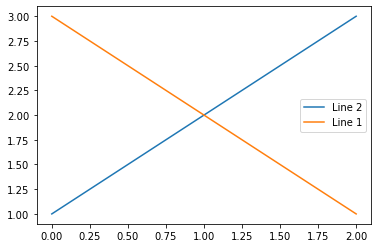

In [2]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend(handles=[line_up, line_down])

在某些情况下，可能不能对句柄的标签进行设置，此时需要向`legend()`传入一个标签组成的列表：

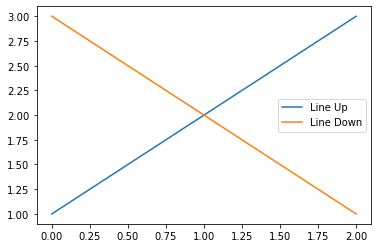

In [3]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend([line_up, line_down], ['Line Up', 'Line Down'])

## 创建特殊的Artist以添加图例（代理Artist）
不是所有句柄都能被自动转换成图例条目，因此常常需要创建一个能在其中自动转换句柄的新artist来完成这一工作。在使用时，图例不是必须只能存在于`Figure`或`Axes`中的。

假设我们想要创建一个图例，它的输入数据使用红色来表示：

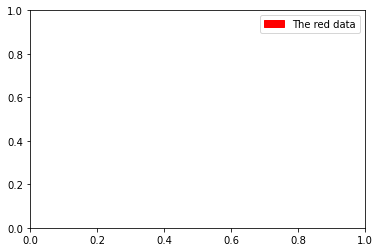

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.show()

图例可以支持很多不同的句柄。除了创建一个色块，我们还可以创建一根带标记的线：

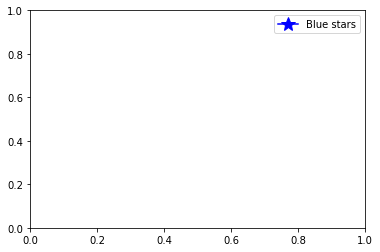

In [5]:
import matplotlib.lines as mlines

fig, ax = plt.subplots()
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
ax.legend(handles=[blue_line])

plt.show()

## 图例位置
图例的位置可以通过关键字参数*loc*指定。详见[legend()文档](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)。

`bbox_to_anchor`关键字能让你更大程度地手动控制图例的位置。举例来说，如果你想要你的axes中的图例位于图像的右上角，而不是位于axes里，你只需要指定那个右上角的位置坐标和所用的坐标系就行：

In [6]:
ax.legend(bbox_to_anchor=(1, 1), 
          bbox_transform=fig.transFigure)

No handles with labels found to put in legend.


下面是另一个自定义图例位置的例子：

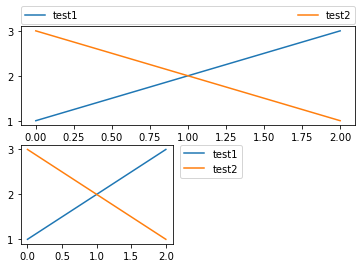

In [7]:
fig, ax_dict = plt.subplot_mosaic([['top', 'top'], ['bottom', 'BLANK']],
                                  empty_sentinel="BLANK")
ax_dict['top'].plot([1, 2, 3], label='test1')
ax_dict['top'].plot([3, 2, 1], label='test2')
# 在这个子图上方添加图例，宽度扩展至与绘图界框相同。
ax_dict['top'].legend(bbox_to_anchor=(0., 1.02, 1., 0.102), loc='lower left',
                      ncol=2, mode="expand", borderaxespad=0)

ax_dict['bottom'].plot([1, 2, 3], label='test1')
ax_dict['bottom'].plot([3, 2, 1], label='test2')
# 将图例放置在这个小子图的右侧
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

## 在同一个Axes中使用多个图例
有时将一个图例拆分成多个图例显示会让信息更清晰。你会猜想这样是不是可以通过调用多次`legned()`来实现，但是你会发现这样做只能在Axes上保留一个图例。之所以会这样是因为重复地调用`legend()`会使图例更新到与Axes上最新的句柄一致。为了保留旧的图例，我们必须要手动将它们加入到Axes里：

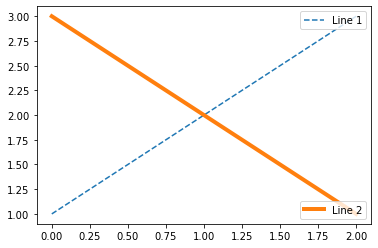

In [8]:
fig, ax = plt.subplots()
line1, = ax.plot([1, 2, 3], label='Line 1', linestyle='--')
line2, = ax.plot([3, 2, 1], label='Line 2', linewidth=4)

# 创建第一条线的图例
first_legend = ax.legend(handles=[line1], loc='upper right')
# 手动将图例加入到Axes中
ax.add_artist(first_legend)

# 再为第二条线创建一个图例
ax.legend(handles=[line2], loc='lower right')

plt.show()

## 图例处理器(handler)
在创建图例条目时，句柄被当作参数传到适当的处理器`HandlerBase`的子类中。选择哪个处理器子类由下面的规则决定：
1. 用`handler_map`关键字中的值对`get_legend_handler_map()`进行更新；
2. 检查句柄`handle`是否已经存在新创建的`handler_map`中；
3. 检查`handle`的类型是否已经存在新创建的`handler_map`中；
4. 检查`handle`的MRO的所有类型都已经存在新创建的`handler_map`中

上述的规则大多是在`get_legend_handler()`中完成的。

上述方法的灵活性能让我们有机会为我们自己创建的图例图示类型来部署自定义的处理器。

使用自定义的处理器的最简单的例子是初始化已有的[lengend_hander.HandlerBase](https://matplotlib.org/stable/api/legend_handler_api.html#matplotlib.legend_handler.HandlerBase)子类中的其中一种。为了简单讲讲，让我们用`legend_handler.HandlerLine2D`进行讲解，它可接受*numpoints*（点的数量）作为参数（其实为了方便，numpoints也是`legend()`的一个参数）。我们可以将实例到处理器之间的映射关系作为关键字传入`legned()`中。

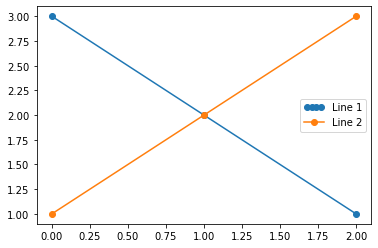

In [9]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots()
line1, = ax.plot([3, 2, 1], marker='o', label='Line 1')
line2, = ax.plot([1, 2, 3], marker='o', label='Line 2')

ax.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

如你所见，"Line 1"现在有四个标记点在上面，而"Line 2"是默认的两个。在上面的代码中，如果我们将映射的键值从`line1`变成`type(line1)`，你会发现两个`Line2D`实例的图示都变成了四个标记点。

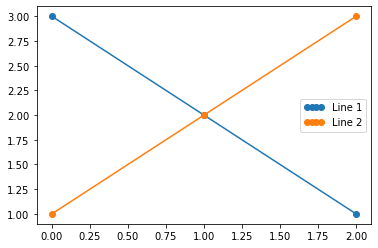

In [10]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots()
line1, = ax.plot([3, 2, 1], marker='o', label='Line 1')
line2, = ax.plot([1, 2, 3], marker='o', label='Line 2')

ax.legend(handler_map={type(line1): HandlerLine2D(numpoints=4)})

对于一些复杂绘图类型的处理器，如在误差条形图、茎叶图和直方图中，默认的`handler_map`有一个特殊的元组`tuple`处理器(`legend_handler.HandlerTuple`)。对于给定的元组，它会将其中的每个句柄的图示直接绘制在前一个句柄之上。下面的例子展示了它将两个图例的图示结合之后重叠绘制出来的样子：

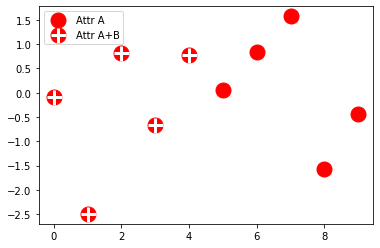

In [11]:
from numpy.random import randn

z = randn(10)

fig, ax = plt.subplots()
red_dot, = ax.plot(z, "ro", markersize=15)
# 在一部分数据上加上白色十字
white_cross, = ax.plot(z[:5], 'w+', markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

`legned_handler.HandlerTuple`类也可以用来将多个图例图示合并一个条目内显示：

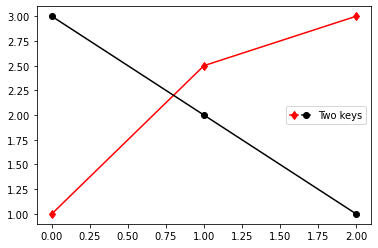

In [12]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

fig, ax = plt.subplots()
p1, = ax.plot([1, 2.5, 3], 'r-d')
p2, = ax.plot([3, 2, 1], 'k-o')

l = ax.legend([(p1, p2)], ['Two keys'], numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)})

## 实现自定义的图例处理器
通过实现自定义的图例处理器，可以将任何句柄转换为图例的图示（句柄不一定要是matplotlib的Artist）。处理器需要执行一个`legend_artist`方法，它会返回一个artist供图例使用。`legend_artist`需要的签名详见[legend_artist](https://matplotlib.org/stable/api/legend_handler_api.html#matplotlib.legend_handler.HandlerBase.legend_artist)。

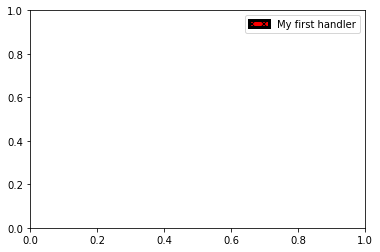

In [13]:
import matplotlib.patches as mpatches

class AnyObject:
    pass

class AnyObjectHandler:
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch
    
fig, ax = plt.subplots()

ax.legend([AnyObject()], ['My first handler'],
          handler_map={AnyObject: AnyObjectHandler()})

还有另一种方式，如果我们想要全局使用`AnyObject`实例，不想总是手动去设置*handler_map*，我们可以用下面的方式来注册一个新的处理器：

In [14]:
from matplotlib.legend import Legend
Legend.update_default_handler_map({AnyObject: AnyObjectHandler})

尽管自定义一个处理器的方法很强，不要忘了我们已经有了许多处理器可以应用，你想要实现的效果可能用这些现存的类就已经可以了。举个例子，为了创建一个椭圆形而不是矩形的图示，你可以：

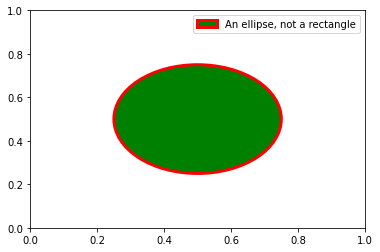

In [15]:
from matplotlib.legend_handler import HandlerPatch

class HandlerElipse(HandlerPatch):
    def creat_artists(self, legend, orig_handle,
                      xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Elipse(xy=center, width=width + xdescent,
                            height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)

fig, ax = plt.subplots()

ax.add_patch(c)
ax.legend([c], ["An ellipse, not a rectangle"],
          handler_map={mpatches.Circle: HandlerElipse()})
